In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, balanced_accuracy_score, average_precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier ,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from datetime import date
warnings.filterwarnings('ignore')

In [2]:
# Reading the data file
df = pd.read_csv('/kaggle/input/kickstarter-projects/ks-projects-201801.csv')


In [3]:
# Checking the head of the data
df.head(7)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00


In [4]:
# Variable Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
# Getting dimensions of dataset

df.shape

(378661, 15)

In [6]:
# Taking column names to use them later

categories = df.main_category.unique()
categories

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [7]:
# Getting column value types

df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [8]:
# Getting short summary statistics of columns

df.describe().round(2)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.00,378661.00,374864.00,378661.00,3.786610e+05
mean,1.074731e+09,4.908079e+04,9682.98,105.62,7036.73,9058.92,4.545440e+04
std,6.190862e+08,1.183391e+06,95636.01,907.19,78639.75,90973.34,1.152950e+06
min,5.971000e+03,1.000000e-02,0.00,0.00,0.00,0.00,1.000000e-02
25%,5.382635e+08,2.000000e+03,30.00,2.00,16.98,31.00,2.000000e+03
50%,1.075276e+09,5.200000e+03,620.00,12.00,394.72,624.33,5.500000e+03
75%,1.610149e+09,1.600000e+04,4076.00,56.00,3034.09,4050.00,1.550000e+04
max,2.147476e+09,1.000000e+08,20338986.27,219382.00,20338986.27,20338986.27,1.663614e+08


In [9]:
# Checking for Null values

for each in df.columns:
    print(f'{each}: ',any(df[f'{each}'].isnull()))

ID:  False
name:  True
category:  False
main_category:  False
currency:  False
deadline:  False
goal:  False
launched:  False
pledged:  False
state:  False
backers:  False
country:  False
usd pledged:  True
usd_pledged_real:  False
usd_goal_real:  False


In [10]:
# Null values in a column 'name'

df[df['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [11]:
# Null values in a column 'usd pledged'

df[df['usd pledged'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378233,997971307,"EQUUS International Film Festival®, all-equine...",Film & Video,Film & Video,USD,2015-02-03,7500.0,2014-12-05 04:19:14,10.00,undefined,0,"N,0""",NaN,10.00,7500.00
378303,998319149,Emily 2050 - Short Film,Film & Video,Film & Video,CAD,2014-05-23,3000.0,2014-04-08 00:30:09,3102.00,undefined,0,"N,0""",NaN,2845.61,2752.04
378434,9988744,Matthew Stephens Music,Music,Music,USD,2016-02-05,5000.0,2016-01-06 21:59:23,235.00,undefined,0,"N,0""",NaN,235.00,5000.00
378585,999610349,Lady Vendredi: Afrofuturist concept 12 inch EP,Music,Music,GBP,2015-10-19,2000.0,2015-09-21 22:33:18,2125.00,undefined,0,"N,0""",NaN,3273.36,3080.81


In [12]:
# highest backed product
high = df.loc[df['usd_pledged_real'].idxmax()]
high


ID                                                        1799979574
name                Pebble Time - Awesome Smartwatch, No Compromises
category                                              Product Design
main_category                                                 Design
currency                                                         USD
deadline                                                  2015-03-28
goal                                                        500000.0
launched                                         2015-02-24 15:44:42
pledged                                                  20338986.27
state                                                     successful
backers                                                        78471
country                                                           US
usd pledged                                              20338986.27
usd_pledged_real                                         20338986.27
usd_goal_real                     

In [13]:
# least supported product
df7 =df
df7 = df7[(df7.goal > 1)].sort_values('usd_pledged_real')
low = df7.loc[df7['usd_pledged_real'].idxmin()]
low

ID                                       1000002330
name                The Songs of Adelaide & Abullah
category                                     Poetry
main_category                            Publishing
currency                                        GBP
deadline                                 2015-10-09
goal                                         1000.0
launched                        2015-08-11 12:12:28
pledged                                         0.0
state                                        failed
backers                                           0
country                                          GB
usd pledged                                     0.0
usd_pledged_real                                0.0
usd_goal_real                               1533.95
Name: 0, dtype: object

In [14]:
# finding the outliers 
new_df = pd.DataFrame()
df8 = df[['usd_pledged_real', 'usd_goal_real']]
for i,j in enumerate(df8.columns):
    Q1 = np.percentile( df8[j], 25)
    Q3 = np.percentile( df8[j], 75)

    # 2.
    Q1,Q3 = np.percentile(df8[j] , [25,75])

    # Find IQR, upper limit, lower limit
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    # Find outliers
    outliers = df8[j][(df8[j] > ul) | (df8[j] < ll)]
    #new_df = new_df.append(outliers, ignore_index=True)
    new_df = pd.concat([new_df, pd.DataFrame([outliers])], ignore_index=True)
   
    

new_df = new_df.T 
new_df.columns = df8.columns

In [15]:
new_df.describe()

,usd_pledged_real,usd_goal_real
count,5.057800e+04,4.550800e+04
mean,5.825341e+04,3.221480e+05
std,2.431794e+05,3.312619e+06
min,1.007900e+04,3.575379e+04
25%,1.363981e+04,5.000000e+04
50%,2.109700e+04,6.950000e+04
75%,4.121500e+04,1.200000e+05
max,2.033899e+07,1.663614e+08


<Axes: >

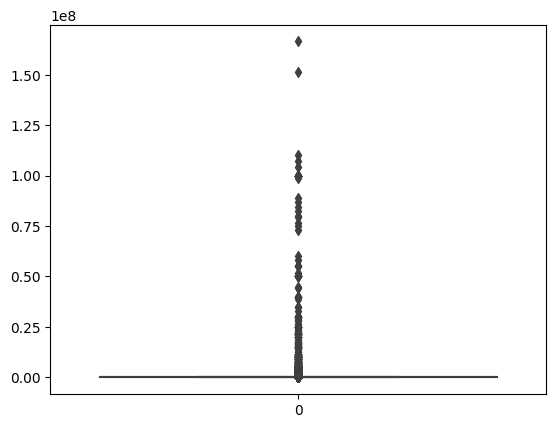

In [16]:
# Plotting the box plots to check outliers
sns.boxplot(df['usd_goal_real'])

<Axes: >

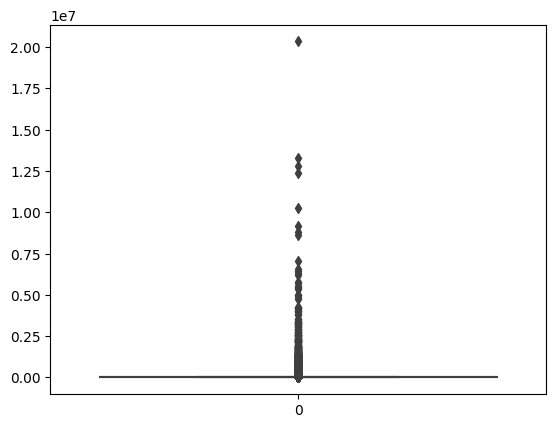

In [17]:
# plotting bix plot
sns.boxplot(df['usd_pledged_real'])

# Pie chart showing projects by their condition

In [18]:
variable = 'state'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [19]:
temp_pie = pie_chart[:4]
temp_pie[3] = pie_chart[3:6].sum()
temp_pie = temp_pie.rename(index= {'undefined' : 'others'})
temp_pie.name = ''

In [20]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('state', inplace=True)
output = output.rename(columns = {'state': 'Number'})

,count,Share
state,,
failed,197719,52.22%
successful,133956,35.38%
canceled,38779,10.24%
undefined,3562,0.94%
live,2799,0.74%
suspended,1846,0.49%


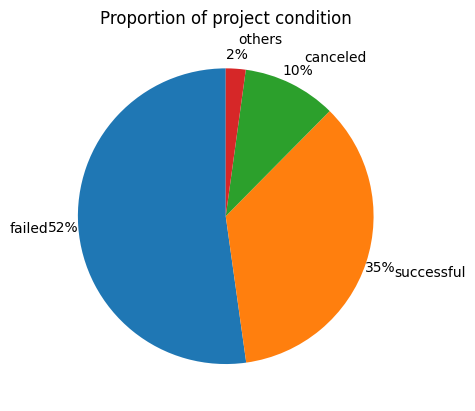

In [21]:
#pie_chart.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
temp_pie.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Proportion of project condition')
output

# Bar graph showing projects by their main category

In [22]:
variable = "main_category"

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [23]:
output
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('Main Category', inplace=True)
output = output.rename(columns = {'main_category': 'Number'})

,count,Share
Main Category,,
Film & Video,63585,16.79%
Music,51918,13.71%
Publishing,39874,10.53%
Games,35231,9.30%
Technology,32569,8.60%
Design,30070,7.94%
Art,28153,7.43%
Food,24602,6.50%
Fashion,22816,6.03%


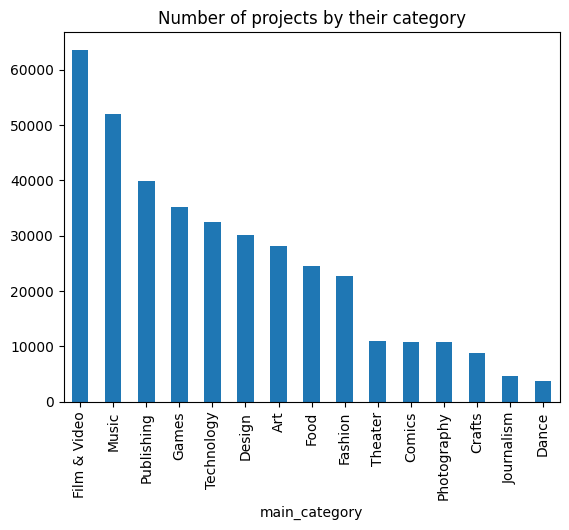

In [24]:
pie_chart.plot(kind = "bar")
plt.title('Number of projects by their category')
output

# Bar graph showing projects by required currency types

In [25]:
variable = 'currency'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [26]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('Currency types', inplace=True)
output = output.rename(columns = {'currency': 'Number of project'})

,count,Share
Currency types,,
USD,295365,78.00%
GBP,34132,9.01%
EUR,17405,4.60%
CAD,14962,3.95%
AUD,7950,2.10%
SEK,1788,0.47%
MXN,1752,0.46%
NZD,1475,0.39%
DKK,1129,0.30%


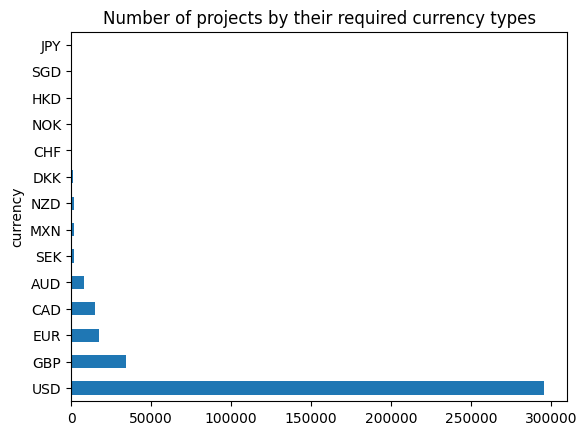

In [27]:
pie_chart.plot(kind = "barh")
plt.title('Number of projects by their required currency types')

output

# Pie chart showing projects by their countries

In [28]:
temp_df = df[df['country'] != 'N,0"']

variable = 'country'
output = pd.DataFrame((temp_df[variable].value_counts()))

In [29]:
output['Share'] = (output / output.sum()*100).round(2)
output.index.rename('Countries', inplace=True)
output = output.rename(columns = {'country': 'Number of project'})

In [30]:
temp = output.copy(deep=True)
temp_output = temp[:6]
temp_output.iloc[5] = temp[5:].sum()
temp_output = temp_output.rename(index= {'FR' : 'Others'})

temp_output

,count,Share
Countries,,
US,292627,78.06
GB,33672,8.98
CA,14756,3.94
AU,7839,2.09
DE,4171,1.11
Others,21799,5.83


In [31]:
output['Share'] = output['Share'].map("{:,.2f}%".format)

In [32]:
#temp_output['Share'] = temp_output['Share'].map("{:,.2f}%".format)
temp_output.Share.name = ''
temp_output

,count,Share
Countries,,
US,292627,78.06
GB,33672,8.98
CA,14756,3.94
AU,7839,2.09
DE,4171,1.11
Others,21799,5.83


,count,Share
Countries,,
US,292627,78.06%
GB,33672,8.98%
CA,14756,3.94%
AU,7839,2.09%
DE,4171,1.11%
FR,2939,0.78%
IT,2878,0.77%
NL,2868,0.77%
ES,2276,0.61%


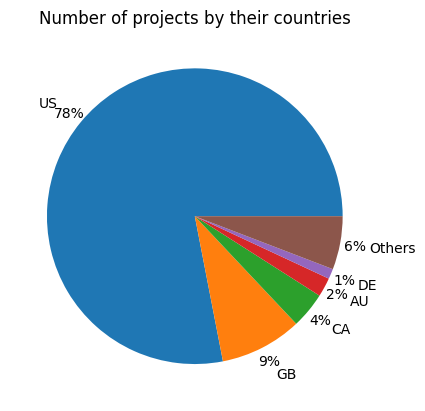

In [33]:
temp_output.Share.plot(kind = "pie",  autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Number of projects by their countries')

output

# Success rate of projects by countries

In [34]:
# Dropping unknown values in a column 'country'
total_df = df[df['country'] != 'N,0"']
total_df.shape

(374864, 15)

In [35]:
#total_df.groupby(['main_category', 'country'])['state'].aggregate('count').unstack()

In [36]:
# Groupping number of all projects by their categories and countries

tdf = total_df.pivot_table('state', index='country', columns = 'main_category', aggfunc='count', margins =True)
tdf

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
country,,,,,,,,,,,,,,,,
AT,40.0,6.0,13.0,3.0,82.0,37.0,51.0,42.0,69.0,11.0,37.0,30.0,39.0,130.0,7.0,597
AU,425.0,188.0,183.0,32.0,929.0,717.0,940.0,477.0,961.0,109.0,470.0,286.0,833.0,1215.0,74.0,7839
BE,45.0,9.0,21.0,1.0,71.0,54.0,47.0,37.0,98.0,9.0,55.0,26.0,42.0,98.0,4.0,617
CA,1067.0,521.0,426.0,94.0,1500.0,1060.0,1703.0,1047.0,1884.0,218.0,1172.0,394.0,1551.0,1924.0,195.0,14756
CH,48.0,6.0,22.0,4.0,132.0,65.0,55.0,50.0,65.0,5.0,49.0,14.0,35.0,206.0,5.0,761
DE,221.0,47.0,95.0,20.0,563.0,287.0,314.0,227.0,665.0,71.0,297.0,211.0,282.0,839.0,32.0,4171
DK,89.0,15.0,33.0,3.0,175.0,77.0,112.0,60.0,105.0,22.0,102.0,25.0,83.0,189.0,23.0,1113
ES,163.0,36.0,42.0,7.0,218.0,193.0,169.0,115.0,507.0,41.0,142.0,56.0,170.0,409.0,8.0,2276
FR,175.0,33.0,77.0,18.0,304.0,254.0,274.0,136.0,502.0,35.0,183.0,103.0,183.0,645.0,17.0,2939


In [37]:
# Groupping number of ONLY SUCCESSFULL projects by their categories and countries
# NaN values mean that there is no any successfull project of a category A in country B

success_df = total_df.query('state == "successful"')
sdf = success_df.pivot_table('state', index='country', columns = 'main_category', aggfunc='count', margins =True)
sdf

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
country,,,,,,,,,,,,,,,,
AT,5.0,3.0,1.0,1.0,21.0,10.0,8.0,4.0,11.0,NaN,9.0,10.0,9.0,15.0,NaN,107
AU,134.0,97.0,37.0,15.0,316.0,146.0,248.0,56.0,271.0,16.0,155.0,70.0,258.0,166.0,25.0,2010
BE,13.0,1.0,3.0,1.0,30.0,14.0,12.0,4.0,22.0,NaN,20.0,7.0,17.0,7.0,1.0,152
CA,325.0,292.0,104.0,35.0,475.0,299.0,505.0,188.0,498.0,36.0,455.0,96.0,419.0,309.0,98.0,4134
CH,15.0,3.0,5.0,NaN,52.0,20.0,10.0,7.0,18.0,NaN,12.0,3.0,4.0,36.0,2.0,187
DE,63.0,12.0,25.0,6.0,185.0,61.0,86.0,23.0,152.0,6.0,83.0,44.0,48.0,134.0,9.0,937
DK,40.0,4.0,7.0,1.0,63.0,29.0,49.0,10.0,25.0,10.0,47.0,6.0,26.0,30.0,13.0,360
ES,46.0,11.0,8.0,NaN,47.0,39.0,48.0,12.0,136.0,6.0,38.0,12.0,43.0,41.0,5.0,492
FR,64.0,14.0,22.0,4.0,134.0,74.0,103.0,23.0,163.0,10.0,67.0,29.0,73.0,122.0,6.0,908


In [38]:
# Calculating success rate of projects by their categories and countries
#from pandas.plotting.table import table

success_rate = (sdf/tdf*100).round(decimals = 2)
success_rate

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
country,,,,,,,,,,,,,,,,
AT,12.50,50.00,7.69,33.33,25.61,27.03,15.69,9.52,15.94,NaN,24.32,33.33,23.08,11.54,NaN,17.92
AU,31.53,51.60,20.22,46.88,34.02,20.36,26.38,11.74,28.20,14.68,32.98,24.48,30.97,13.66,33.78,25.64
BE,28.89,11.11,14.29,100.00,42.25,25.93,25.53,10.81,22.45,NaN,36.36,26.92,40.48,7.14,25.00,24.64
CA,30.46,56.05,24.41,37.23,31.67,28.21,29.65,17.96,26.43,16.51,38.82,24.37,27.01,16.06,50.26,28.02
CH,31.25,50.00,22.73,NaN,39.39,30.77,18.18,14.00,27.69,NaN,24.49,21.43,11.43,17.48,40.00,24.57
DE,28.51,25.53,26.32,30.00,32.86,21.25,27.39,10.13,22.86,8.45,27.95,20.85,17.02,15.97,28.12,22.46
DK,44.94,26.67,21.21,33.33,36.00,37.66,43.75,16.67,23.81,45.45,46.08,24.00,31.33,15.87,56.52,32.35
ES,28.22,30.56,19.05,NaN,21.56,20.21,28.40,10.43,26.82,14.63,26.76,21.43,25.29,10.02,62.50,21.62
FR,36.57,42.42,28.57,22.22,44.08,29.13,37.59,16.91,32.47,28.57,36.61,28.16,39.89,18.91,35.29,30.89


In [39]:
# Rate of being not succesfull ( undefined, failed, suspended, cancelled, live  )

100 - success_rate

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,All
country,,,,,,,,,,,,,,,,
AT,87.50,50.00,92.31,66.67,74.39,72.97,84.31,90.48,84.06,NaN,75.68,66.67,76.92,88.46,NaN,82.08
AU,68.47,48.40,79.78,53.12,65.98,79.64,73.62,88.26,71.80,85.32,67.02,75.52,69.03,86.34,66.22,74.36
BE,71.11,88.89,85.71,0.00,57.75,74.07,74.47,89.19,77.55,NaN,63.64,73.08,59.52,92.86,75.00,75.36
CA,69.54,43.95,75.59,62.77,68.33,71.79,70.35,82.04,73.57,83.49,61.18,75.63,72.99,83.94,49.74,71.98
CH,68.75,50.00,77.27,NaN,60.61,69.23,81.82,86.00,72.31,NaN,75.51,78.57,88.57,82.52,60.00,75.43
DE,71.49,74.47,73.68,70.00,67.14,78.75,72.61,89.87,77.14,91.55,72.05,79.15,82.98,84.03,71.88,77.54
DK,55.06,73.33,78.79,66.67,64.00,62.34,56.25,83.33,76.19,54.55,53.92,76.00,68.67,84.13,43.48,67.65
ES,71.78,69.44,80.95,NaN,78.44,79.79,71.60,89.57,73.18,85.37,73.24,78.57,74.71,89.98,37.50,78.38
FR,63.43,57.58,71.43,77.78,55.92,70.87,62.41,83.09,67.53,71.43,63.39,71.84,60.11,81.09,64.71,69.11


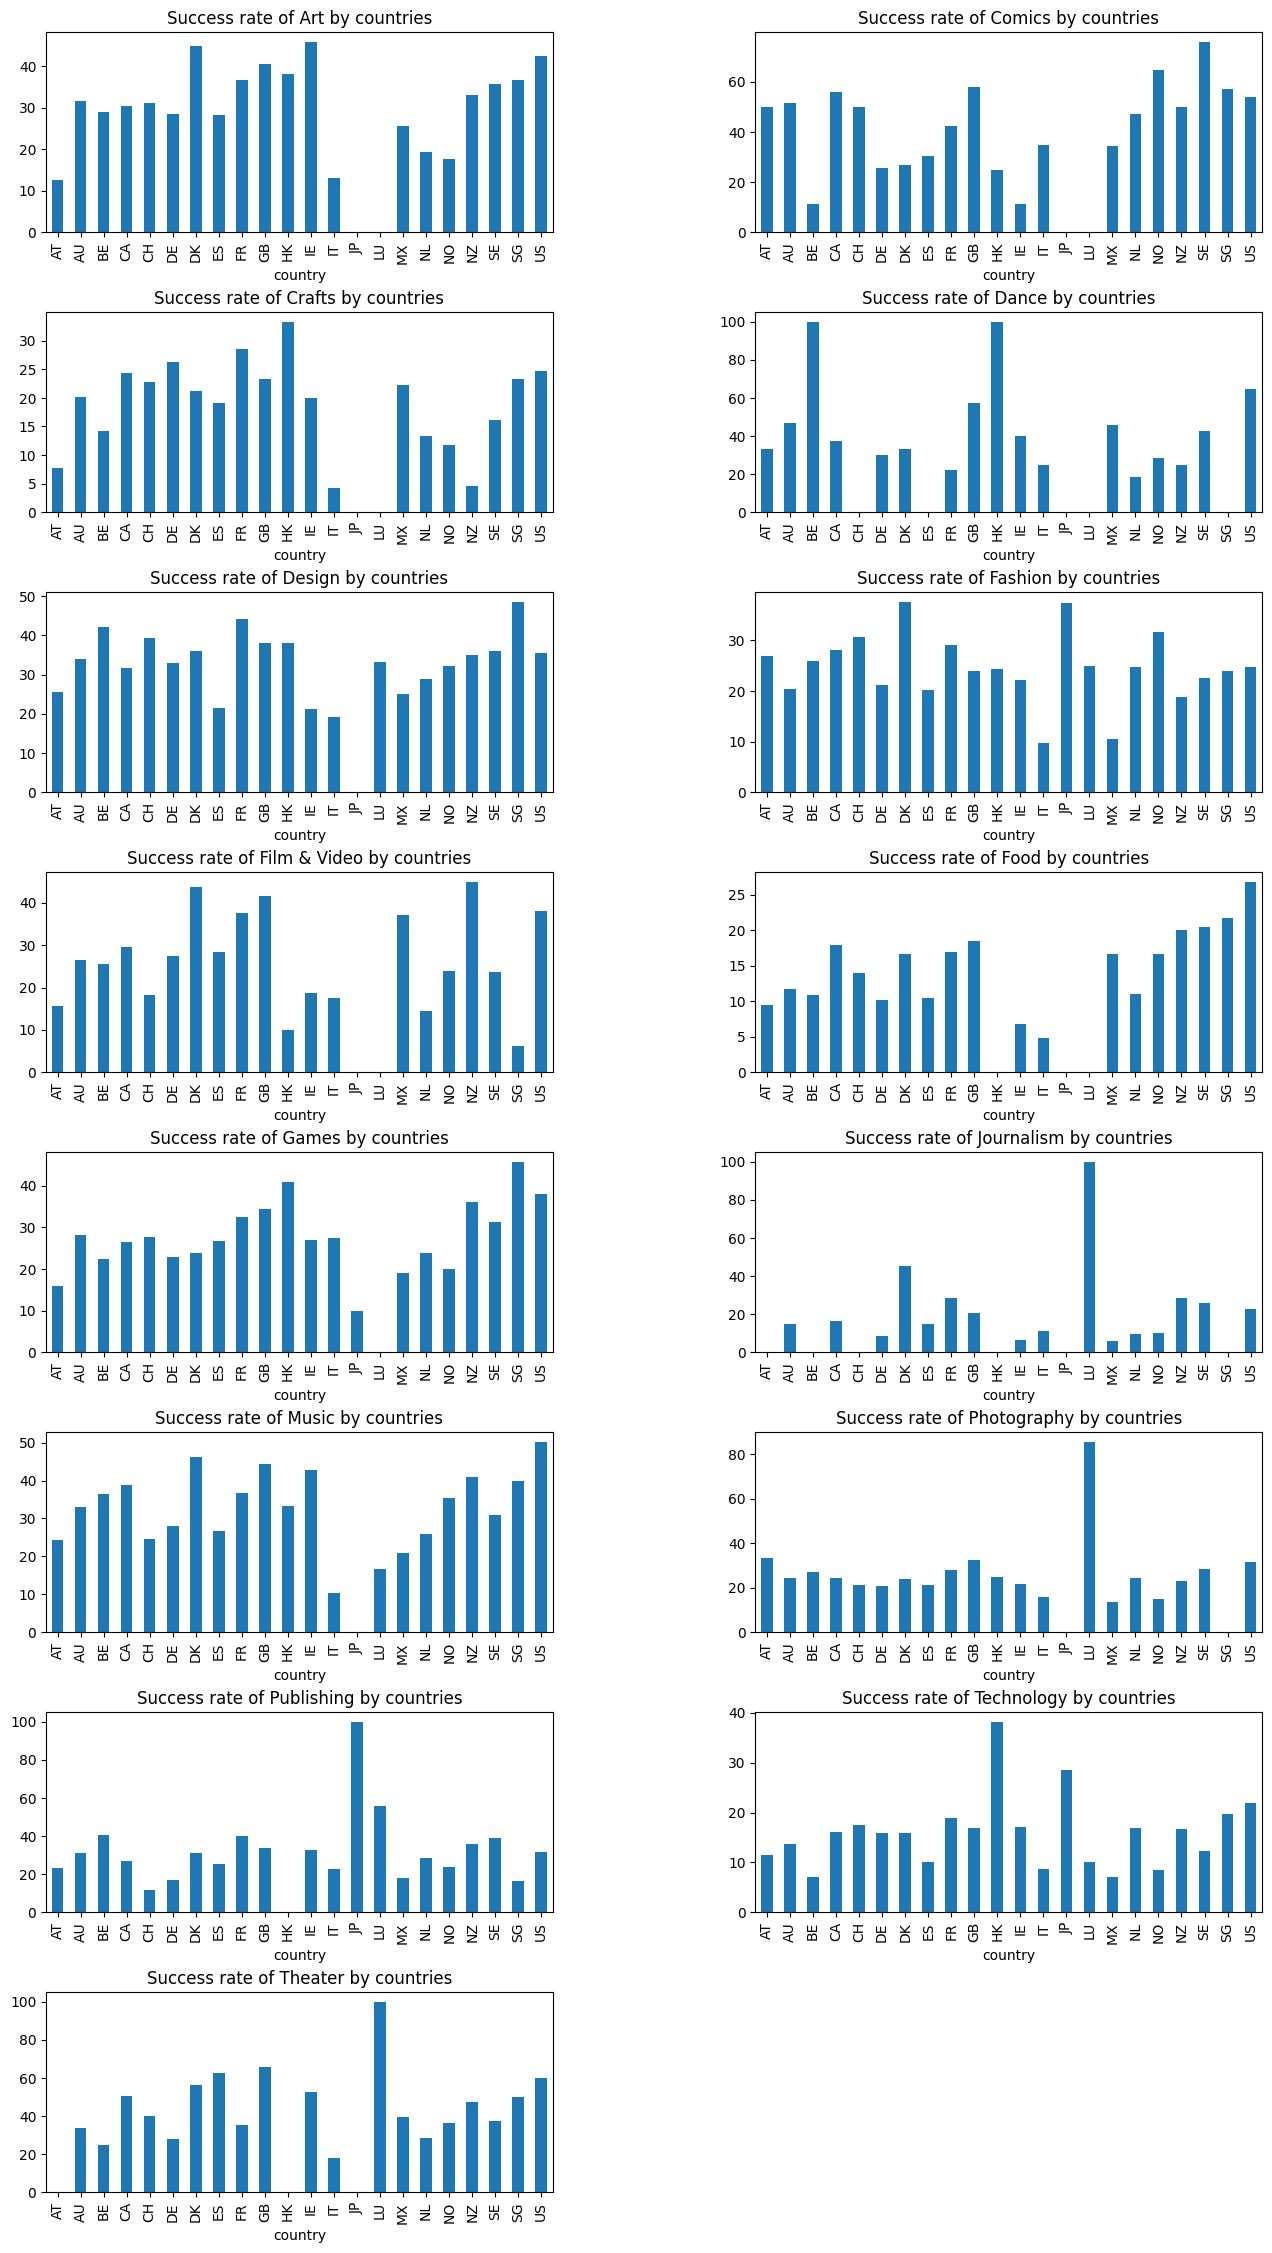

In [40]:
# Plotting Success rate of each category across countries

for i in range(success_rate.shape[1]-1):
    plt.subplot(8,2, i+1)
    success_rate.iloc[:len(success_rate)-1, i].plot(kind = "bar")
    plt.title(f'Success rate of {success_rate.columns[i]} by countries')    
    
        
plt.subplots_adjust(left=0.1,
                    bottom=-0.5,
                    right=2.0,
                    top=4.0,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

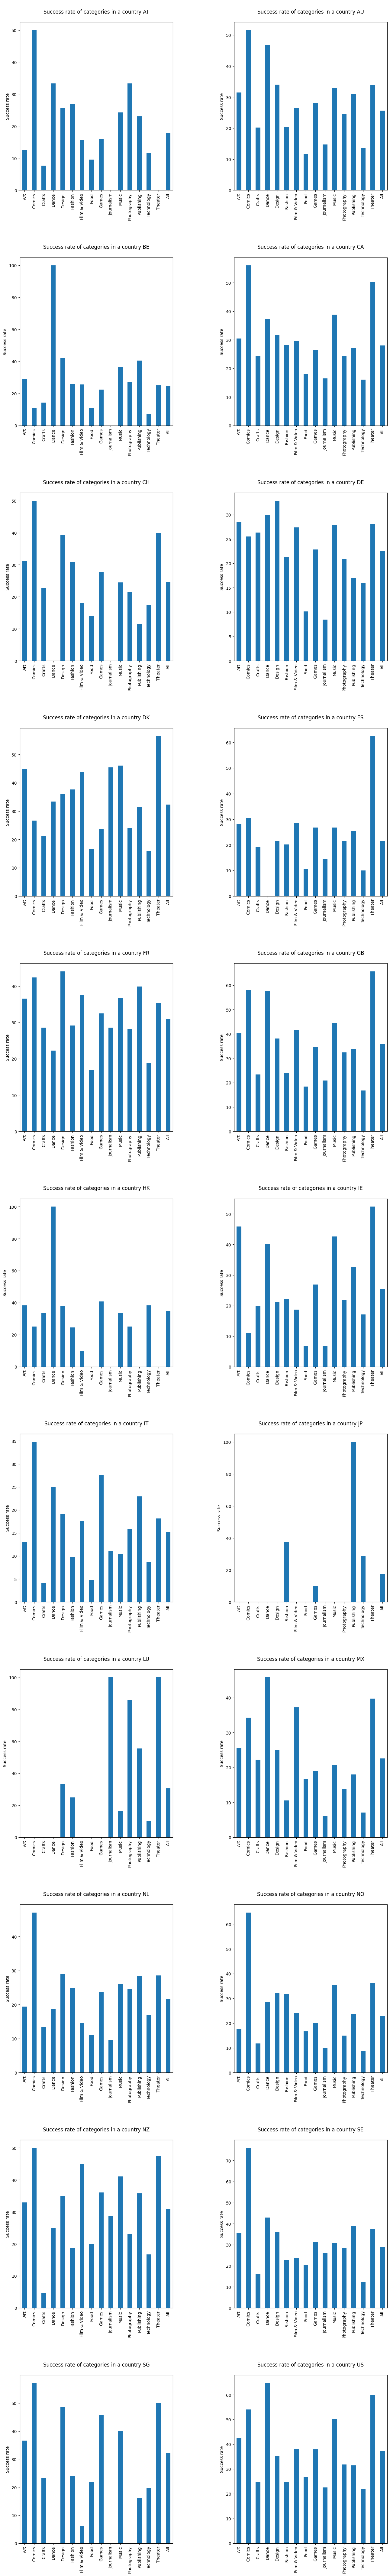

In [41]:
# Plotting Success rate of categories in a specific country

sucess_rate0 = success_rate.T


for i in range(sucess_rate0.shape[1]-1):
    plt.subplot(12,2, i+1)
    sucess_rate0.iloc[:, i].plot(kind = "bar")
    plt.title(f'\nSuccess rate of categories in a country {sucess_rate0.columns[i]}\n')
    plt.ylabel('Success rate')
    plt.xlabel('')
        
plt.subplots_adjust(left=0.1,
                    bottom=-15.0,
                    right=2.0,
                    top=4.0,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

# Mean required amount of successful projects in each category 

In [42]:
success_df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


In [43]:
df5 = df[(df['state'] == "successful")] 
df5.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.338510e+05,1.339560e+05,1.339560e+05
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.735603e+04,2.267080e+04,9.532853e+03
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.301228e+05,1.510903e+05,2.796144e+04
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.162000e+03,2.000000e+03,1.301915e+03
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.655660e+03,5.107250e+03,3.837740e+03
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.042600e+04,1.323208e+04,1.000000e+04
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06


In [44]:
df6 = df[(df['state'] == "failed")] 
df6.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.977190e+05,1.977190e+05,1.977190e+05,197719.000000,197614.000000,197719.000000,1.977190e+05
mean,1.074639e+09,6.734685e+04,1.426971e+03,16.422352,1133.741030,1320.603817,6.317474e+04
std,6.192215e+08,1.447227e+06,9.564415e+03,71.224123,6221.653617,6820.249351,1.435683e+06
min,5.971000e+03,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,1.500000e-01
25%,5.385642e+08,2.500000e+03,3.000000e+00,1.000000,0.000000,2.640000,2.500000e+03
50%,1.073242e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03
75%,1.611052e+09,2.000000e+04,6.710000e+02,12.000000,512.000000,663.000000,2.000000e+04
max,2.147467e+09,1.000000e+08,1.748630e+06,6550.000000,721036.460000,757352.940000,1.663614e+08


In [45]:
# average contribution by a backer
df6 = df
df6 = df6[df6.backers != 0]
df6['ave_cont'] = df6['usd_pledged_real']/df6['backers']
df6['ave_cont'].mean()

75.69746482952095

In [46]:
df5 = df[(df['state'] == "successful")] 
df5.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.338510e+05,1.339560e+05,1.339560e+05
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.735603e+04,2.267080e+04,9.532853e+03
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.301228e+05,1.510903e+05,2.796144e+04
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.162000e+03,2.000000e+03,1.301915e+03
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.655660e+03,5.107250e+03,3.837740e+03
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.042600e+04,1.323208e+04,1.000000e+04
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06


In [47]:
df6 = df[(df['state'] == "failed")] 
df6.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.977190e+05,1.977190e+05,1.977190e+05,197719.000000,197614.000000,197719.000000,1.977190e+05
mean,1.074639e+09,6.734685e+04,1.426971e+03,16.422352,1133.741030,1320.603817,6.317474e+04
std,6.192215e+08,1.447227e+06,9.564415e+03,71.224123,6221.653617,6820.249351,1.435683e+06
min,5.971000e+03,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,1.500000e-01
25%,5.385642e+08,2.500000e+03,3.000000e+00,1.000000,0.000000,2.640000,2.500000e+03
50%,1.073242e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03
75%,1.611052e+09,2.000000e+04,6.710000e+02,12.000000,512.000000,663.000000,2.000000e+04
max,2.147467e+09,1.000000e+08,1.748630e+06,6550.000000,721036.460000,757352.940000,1.663614e+08


In [48]:
# average contribution by a backer
df6 = df
df6 = df6[df6.backers != 0]
df6['ave_cont'] = df6['usd_pledged_real']/df6['backers']
df6['ave_cont'].mean()

75.69746482952095

In [49]:
# Checking the average mean funding for the projects
categories = df.main_category.unique()
categories
goals = []

for each in categories:
    temp = df.query('category == @each')['goal']
    temp = temp.tolist()
    goals.append(temp)
    
goals
goal_stat = pd.DataFrame()

for i in range(len(categories)):
    statistics = pd.Series(goals[i]).describe().round(2)
    goal_stat = pd.concat([goal_stat, statistics], axis = 1)

goal_stat.columns = categories
pd.options.display.float_format = '{:.2f}'.format
goal_stat


,Publishing,Film & Video,Music,Food,Design,Crafts,Games,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism
count,6018.00,10108.00,15727.00,11493.00,4199.00,4664.00,3226.00,4996.00,8554.00,7057.00,8253.00,5752.00,6930.00,2322.00,1747.00
mean,47428.16,81400.97,21427.04,36882.02,41764.75,10678.46,55731.22,33046.77,15380.34,12646.55,48928.06,10714.26,182840.15,8031.34,61547.16
std,1425110.85,1152043.70,478455.45,952936.99,713049.14,60341.96,613704.62,1428953.88,59180.29,125270.56,1508893.86,134456.99,2717067.06,38704.44,1007540.32
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00
25%,2000.00,2000.00,2000.00,3000.00,2500.00,600.00,2000.00,1500.00,2000.00,1500.00,1000.00,1500.00,6500.00,1500.00,2000.00
50%,5000.00,6000.00,5000.00,10000.00,8500.00,2180.00,6000.00,3845.00,5500.00,3000.00,3000.00,3590.00,20000.00,3000.00,5000.00
75%,13000.00,22000.00,10000.00,20000.00,22000.00,6881.25,20000.00,8000.00,15000.00,7000.00,8000.00,8500.00,55000.00,6000.00,14283.94
max,100000000.00,100000000.00,50000000.00,99000000.00,45000000.00,2500000.00,21474836.47,100000000.00,3350000.00,8000000.00,100000000.00,10000000.00,100000000.00,1000000.00,35000000.00


# ****Exploratory Data Analysis

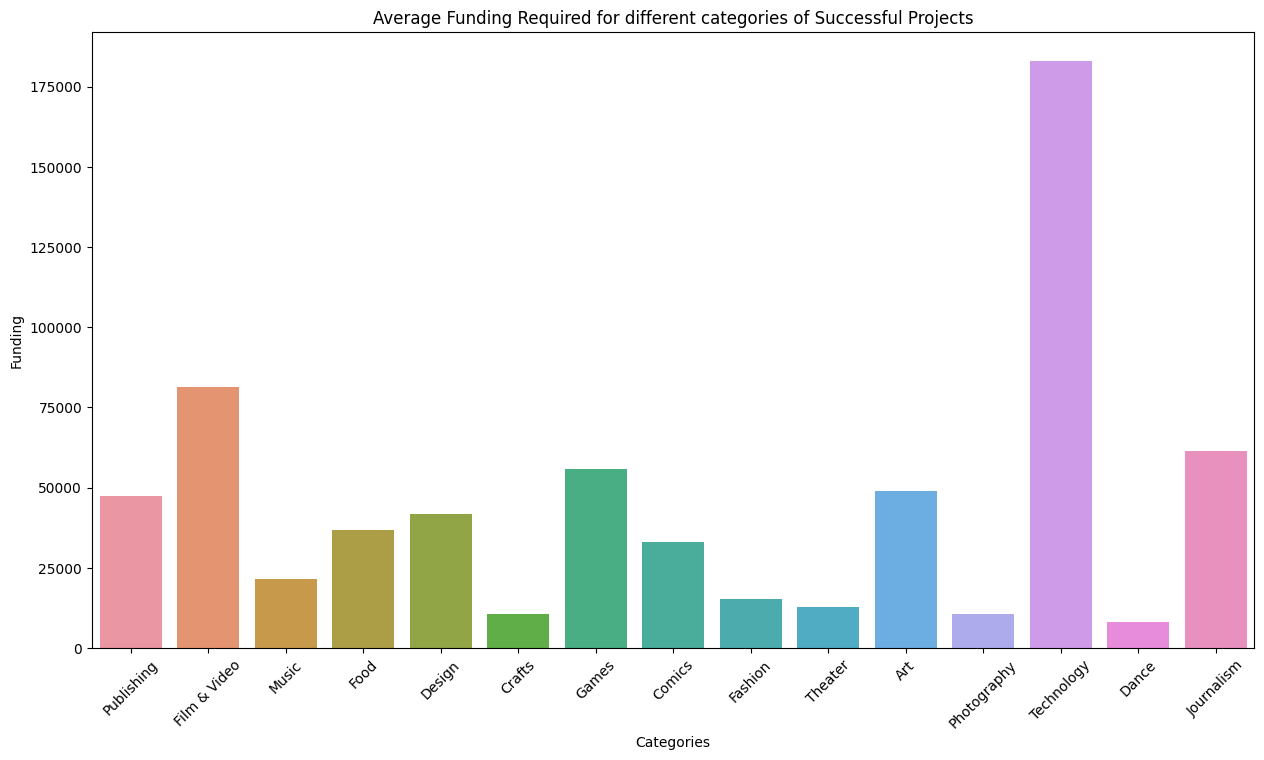

In [50]:
# Below graph shows the mean funding required for different categories
plt.figure(1,(15,8))
sns.barplot(y = 'mean', x = goal_stat.T.index , data = goal_stat.T)
plt.title('Average Funding Required for different categories of Successful Projects')
plt.ylabel('Funding')
plt.xlabel('Categories')
_ = plt.xticks(rotation= 45)

In [51]:
# Parsing the columns launched and deadline
df1 = df[['deadline','launched']]
for i in df1.columns:
    df1[i] =   pd.to_datetime(df1[i])
    df1[str(i) + '_date'] = df1[i].dt.date
    df[str(i)+ '_year'] = df1[i].dt.year
    df[str(i)+'_month'] = df1[i].dt.month
    df[str(i)+'_monthday'] = df1[i].dt.day
    df[str(i)+'_weekday'] = df1[i].dt.day_name()
    df[str(i)+ '_quarter'] = df1[i].dt.quarter
    

In [52]:
df['state'].value_counts() 


state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: count, dtype: int64

<Axes: xlabel='deadline_month', ylabel='count'>

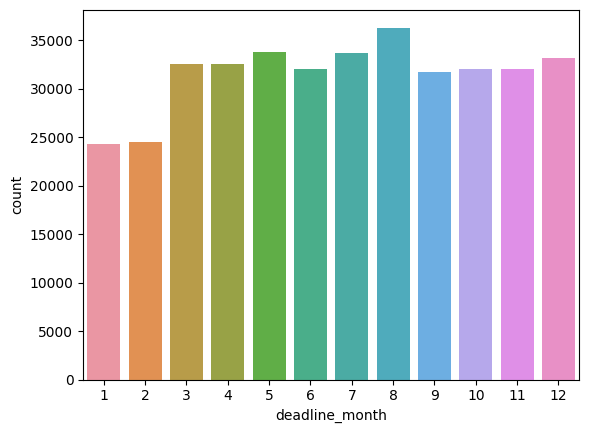

In [53]:
sns.countplot(x = 'deadline_month', data = df)


<Axes: xlabel='launched_month', ylabel='count'>

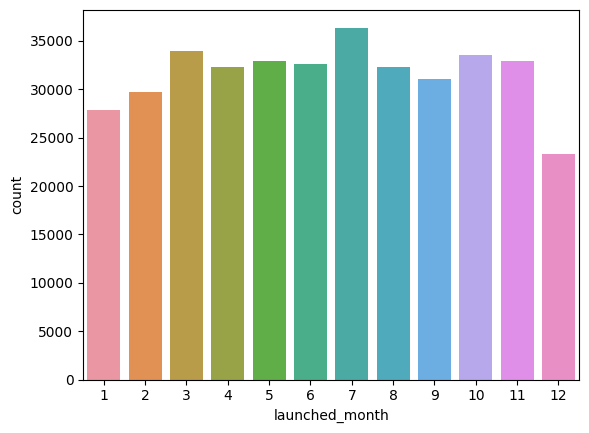

In [54]:
sns.countplot(x = 'launched_month', data = df)


Text(0.5, 0, 'Months')

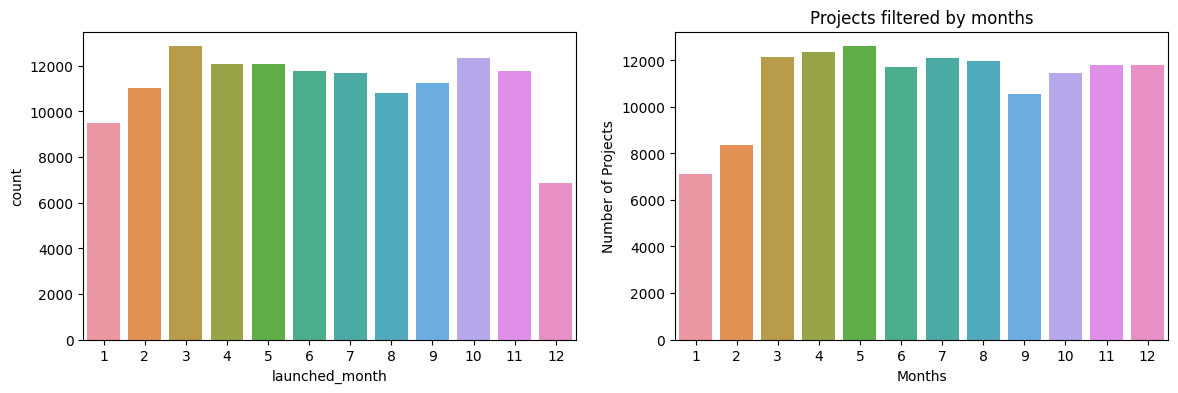

In [55]:
# successfull projects launched and deadline month
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_month', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_month', data = df3)
plt.title('Projects filtered by months')
plt.ylabel('Number of Projects')
plt.xlabel('Months')

<Axes: xlabel='deadline_month', ylabel='count'>

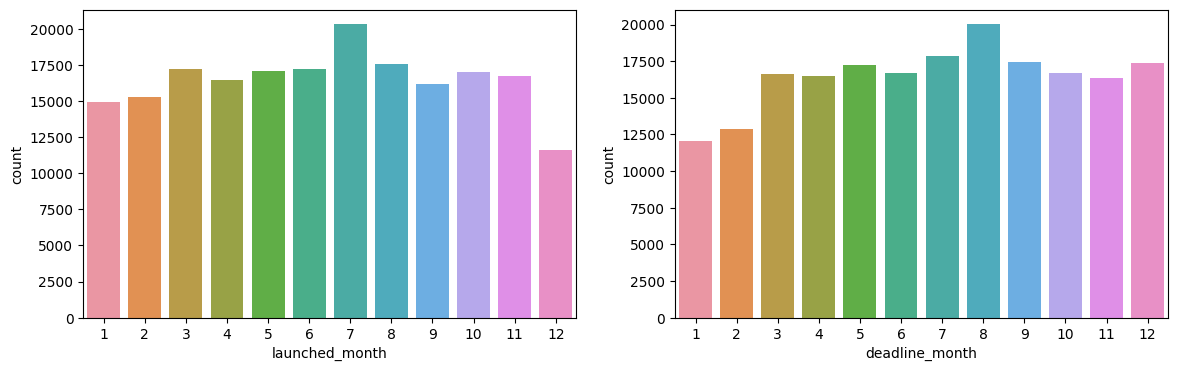

In [56]:
# launched and deadline month for failed months. June and july seem to be having an high failure rate.
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_month', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_month', data = df3)


<Axes: xlabel='deadline_weekday', ylabel='count'>

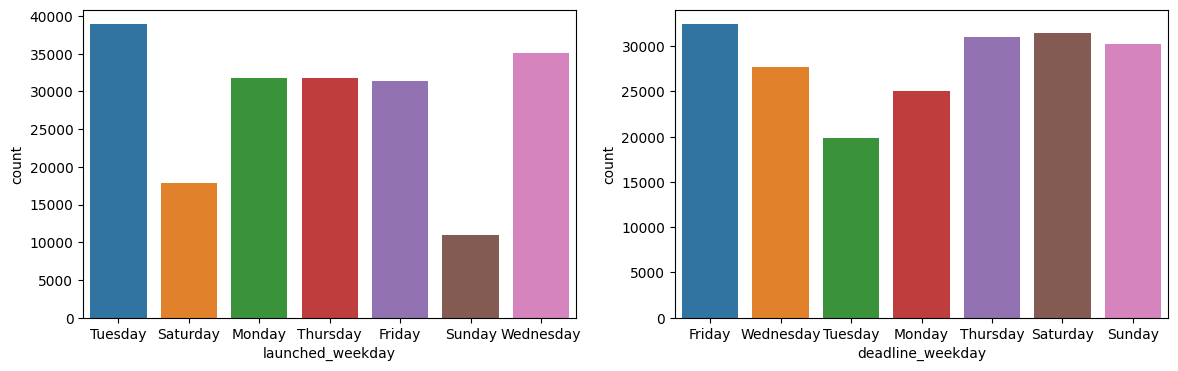

In [57]:
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_weekday', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_weekday', data = df3)


<Axes: xlabel='deadline_weekday', ylabel='count'>

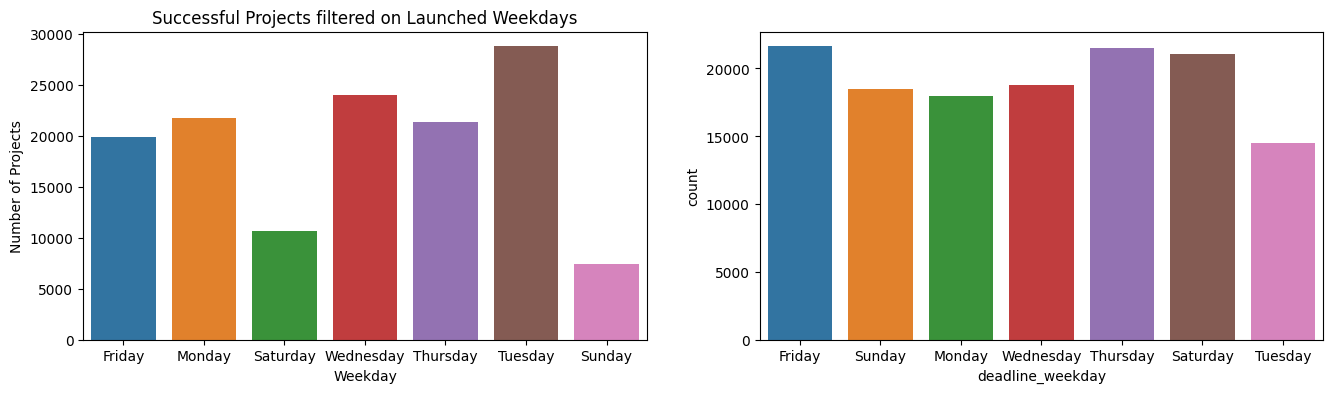

In [58]:
fig = plt.figure(1, (16, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_weekday', data = df3)
plt.title('Successful Projects filtered on Launched Weekdays')
plt.ylabel('Number of Projects')
plt.xlabel('Weekday')
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_weekday', data = df3)


In [59]:
# counting the number of weekdays between quarters.
df['weekday_count'] = df1.apply(lambda x: np.busday_count(x.launched_date, x.deadline_date), axis=1)


In [60]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_month,deadline_monthday,deadline_weekday,deadline_quarter,launched_year,launched_month,launched_monthday,launched_weekday,launched_quarter,weekday_count
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,...,10,9,Friday,4,2015,8,11,Tuesday,3,43
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,...,11,1,Wednesday,4,2017,9,2,Saturday,3,42
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,...,2,26,Tuesday,1,2013,1,12,Saturday,1,31
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,...,4,16,Monday,2,2012,3,17,Saturday,1,20
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,...,8,29,Saturday,3,2015,7,4,Saturday,3,40


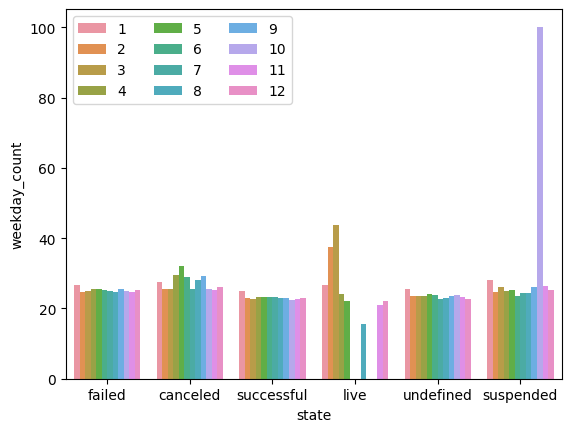

In [61]:
sns.barplot(x ='state',y='weekday_count',hue='deadline_month', data = df,ci=None)
plt.legend(ncol=3)

In [62]:
len(df)

378661

In [63]:
df.drop(df['weekday_count'].idxmax(),inplace=True)


In [64]:
df.loc[df['weekday_count'].idxmax()]

ID                                                       1014746686
name                 Salt of the Earth: A Dead Sea Movie (Canceled)
category                                               Film & Video
main_category                                          Film & Video
currency                                                        USD
deadline                                                 2010-09-15
goal                                                        5000.00
launched                                        1970-01-01 01:00:00
pledged                                                        0.00
state                                                      canceled
backers                                                           0
country                                                          US
usd pledged                                                    0.00
usd_pledged_real                                               0.00
usd_goal_real                                   

In [65]:
df['weekday_count'].nlargest(10)

2842      10619
48147     10597
94579     10543
75397     10536
247913    10523
273779    10507
38476        66
61014        66
74196        66
85716        66
Name: weekday_count, dtype: int64

In [66]:
df.nlargest(6,'weekday_count')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_month,deadline_monthday,deadline_weekday,deadline_quarter,launched_year,launched_month,launched_monthday,launched_weekday,launched_quarter,weekday_count
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.00,1970-01-01 01:00:00,0.00,canceled,...,9,15,Wednesday,3,1970,1,1,Thursday,1,10619
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.00,1970-01-01 01:00:00,0.00,canceled,...,8,14,Saturday,3,1970,1,1,Thursday,1,10597
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.00,1970-01-01 01:00:00,0.00,canceled,...,6,1,Tuesday,2,1970,1,1,Thursday,1,10543
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.00,1970-01-01 01:00:00,0.00,canceled,...,5,21,Friday,2,1970,1,1,Thursday,1,10536
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.00,1970-01-01 01:00:00,0.00,canceled,...,5,4,Tuesday,2,1970,1,1,Thursday,1,10523
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.00,1970-01-01 01:00:00,0.00,canceled,...,4,10,Saturday,2,1970,1,1,Thursday,1,10507


In [67]:
df.drop(df['weekday_count'].nlargest(6).index,inplace=True)
#df['weekday_count'].idxmax(5)

Text(0.5, 0, 'State of the Project')

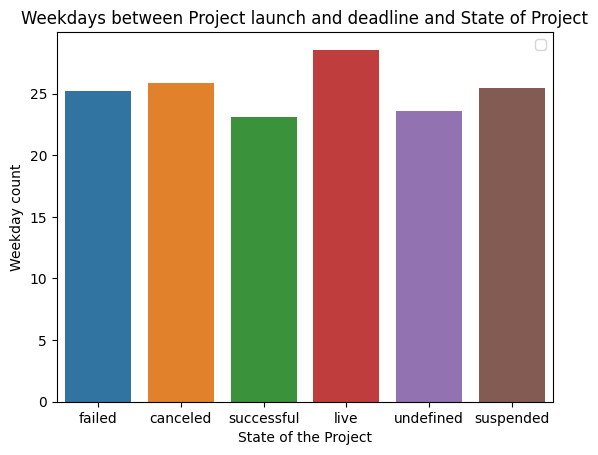

In [68]:
sns.barplot(x ='state',y='weekday_count', data = df,ci=None)
plt.legend(ncol=3)
plt.title('Weekdays between Project launch and deadline and State of Project')
plt.ylabel('Weekday count')
plt.xlabel('State of the Project')

Text(0.5, 0, 'Quarters')

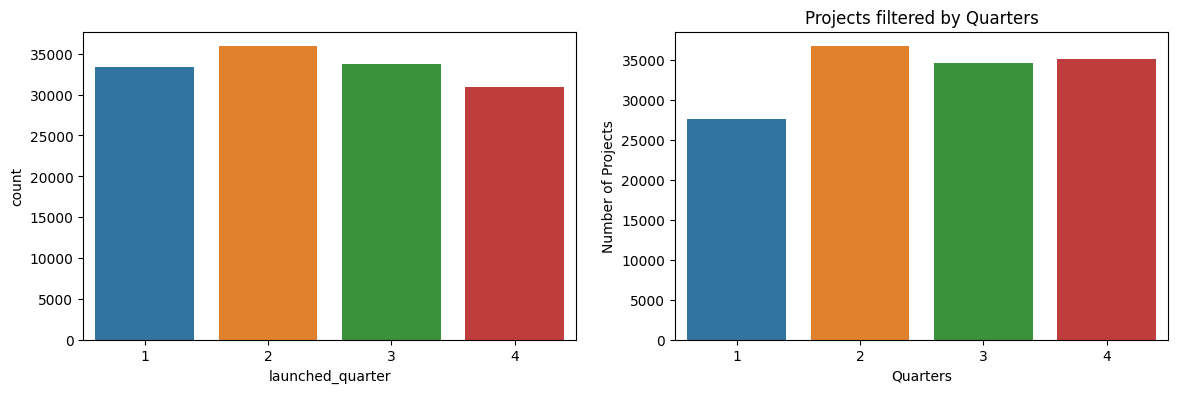

In [69]:
# Plotting successful projects by quarter 
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'successful']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_quarter', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_quarter', data = df3)
plt.title('Projects filtered by Quarters')
plt.ylabel('Number of Projects')
plt.xlabel('Quarters')

<Axes: xlabel='deadline_quarter', ylabel='count'>

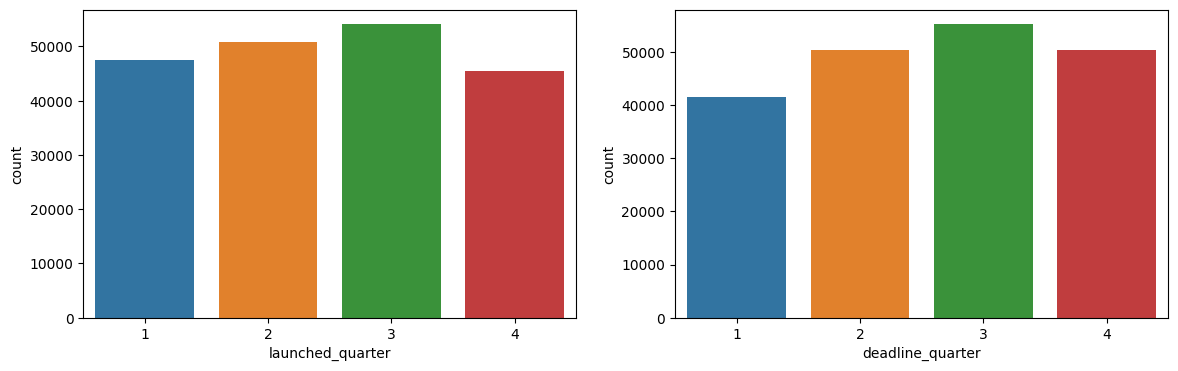

In [70]:
fig = plt.figure(1, (14, 4))
df3 = df[df['state'] == 'failed']
ax = plt.subplot(1,2,1)
sns.countplot(x = 'launched_quarter', data = df3)
ax = plt.subplot(1,2,2)
sns.countplot(x = 'deadline_quarter', data = df3)

<Axes: xlabel='deadline_quarter', ylabel='count'>

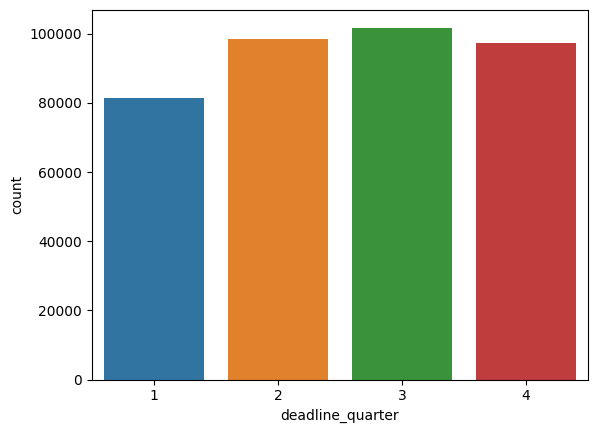

In [71]:
sns.countplot(x = 'deadline_quarter', data = df) # normally lesser projects are anouncced in the first quarter

In [72]:
# Plotting project counts over the years
df9 = df[(df['state'] == "failed") | (df['state'] == "successful")] 
df1 = df[['deadline','launched']]
for i in df1.columns:
    df1[i] =   pd.to_datetime(df1[i])
    df9[str(i) + '_date'] = df1[i].dt.date
    df9[str(i)+ '_year'] = df1[i].dt.year
df9 = df9.groupby('launched_year').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,deadline_monthday,deadline_weekday,deadline_quarter,launched_month,launched_monthday,launched_weekday,launched_quarter,weekday_count,deadline_date,launched_date
launched_year,,,,,,,,,,,,,,,,,,,,,
2009,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,...,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179
2010,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577,...,9577,9577,9577,9577,9577,9577,9577,9577,9577,9577
2011,24049,24048,24049,24049,24049,24049,24049,24049,24049,24049,...,24049,24049,24049,24049,24049,24049,24049,24049,24049,24049
2012,38480,38478,38480,38480,38480,38480,38480,38480,38480,38480,...,38480,38480,38480,38480,38480,38480,38480,38480,38480,38480
2013,41101,41101,41101,41101,41101,41101,41101,41101,41101,41101,...,41101,41101,41101,41101,41101,41101,41101,41101,41101,41101
2014,59306,59306,59306,59306,59306,59306,59306,59306,59306,59306,...,59306,59306,59306,59306,59306,59306,59306,59306,59306,59306
2015,65272,65272,65272,65272,65272,65272,65272,65272,65272,65272,...,65272,65272,65272,65272,65272,65272,65272,65272,65272,65272
2016,49292,49292,49292,49292,49292,49292,49292,49292,49292,49292,...,49292,49292,49292,49292,49292,49292,49292,49292,49292,49292
2017,43419,43419,43419,43419,43419,43419,43419,43419,43419,43419,...,43419,43419,43419,43419,43419,43419,43419,43419,43419,43419


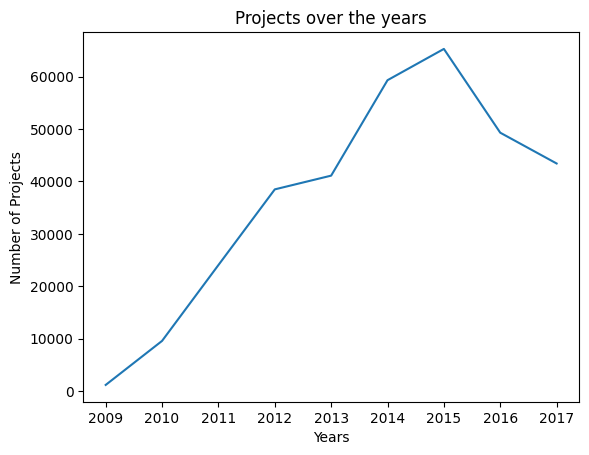

In [73]:
sns.lineplot(y = df9['ID'], x = df9.index)
plt.title('Projects over the years')
plt.ylabel('Number of Projects')
plt.xlabel('Years')
df9

In [74]:
9577/1179 

8.122985581000847

## Data Cleaning

In [75]:
df3 = df.drop(['name','goal', 'pledged', 'usd pledged', 'deadline_year','deadline_month','deadline_monthday','deadline_quarter','launched_quarter','ID','deadline','launched', 'deadline_weekday','currency','category', 'launched_monthday','usd_pledged_real','backers'],axis=1)

In [76]:
df3 = df3[(df3['state'] == "failed") | (df3['state'] == "successful")] # Taking only successful and failed states

In [77]:
category = df3[['main_category','state','launched_year','launched_month','launched_weekday','country']]
numerical = df3[df3.columns.difference(['main_category','state','country','launched_year','launched_month','launched_weekday','country'])]


In [78]:
numerical

,usd_goal_real,weekday_count
0,1533.95,43
1,30000.00,42
2,45000.00,31
3,5000.00,20
5,50000.00,25
...,...,...
378654,6500.00,22
378657,1500.00,19
378658,15000.00,32
378659,15000.00,23


In [79]:
category

,main_category,state,launched_year,launched_month,launched_weekday,country
0,Publishing,failed,2015,8,Tuesday,GB
1,Film & Video,failed,2017,9,Saturday,US
2,Film & Video,failed,2013,1,Saturday,US
3,Music,failed,2012,3,Saturday,US
5,Food,successful,2016,2,Friday,US
...,...,...,...,...,...,...
378654,Food,failed,2017,3,Monday,US
378657,Film & Video,failed,2011,6,Wednesday,US
378658,Film & Video,failed,2010,7,Thursday,US
378659,Technology,failed,2016,1,Wednesday,US


# ****Preprocessing

In [80]:
y = category['state']
category = category.drop('state', axis=1)

In [81]:
scale = preprocessing.scale(numerical)
scale = pd.DataFrame(scale,columns=numerical.columns, index = numerical.index)
scale

,usd_goal_real,weekday_count
0,-0.04,2.05
1,-0.01,1.94
2,0.00,0.73
3,-0.03,-0.48
5,0.01,0.07
...,...,...
378654,-0.03,-0.26
378657,-0.04,-0.59
378658,-0.02,0.84
378659,-0.02,-0.15


In [82]:
category = category.astype(object)
category = pd.get_dummies(category)

In [83]:
X = pd.concat([category, scale,], axis=1) 


In [84]:
y = y.astype(object)
y = pd.get_dummies(y,drop_first=True)
y

,successful
0,False
1,False
2,False
3,False
5,True
...,...
378654,False
378657,False
378658,False
378659,False


# ****Modelling

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

## Machine Learning Algorithm

In [86]:
regressors = [['LogisticRegressor',LogisticRegression()],
              ['KNeighboursClassifier',KNeighborsClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
             ['BaggingClassifier',BaggingClassifier()],
             ['AdaboostClassifier',AdaBoostClassifier()]]
Acc = pd.DataFrame()

In [87]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,y_train)
    actr1 = accuracy_score(y_train, model.predict(X_train))
    acte1 = accuracy_score(y_test, model.predict(X_test))
    
    #Acc = Acc.append(pd.Series({'model':name, 'train_score':actr1,'test_score':acte1}),ignore_index=True )
    #new_df = pd.concat([new_df, pd.DataFrame([outliers])], ignore_index=True)
    Acc = pd.concat([Acc,pd.DataFrame([pd.Series({'model':name, 'train_score':actr1,'test_score':acte1})])],ignore_index=True )

In [88]:
Acc

,model,train_score,test_score
0,LogisticRegressor,0.65,0.65
1,KNeighboursClassifier,0.74,0.61
2,RandomForestClassifier,0.97,0.63
3,BaggingClassifier,0.95,0.63
4,AdaboostClassifier,0.66,0.66


In [ ]:
# Using cv to check the best parameters for random forest classifier
params = {
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7],'n_estimators': [100,200,300,400,500]}
R = RandomizedSearchCV(RandomForestClassifier(),params,cv = 10,verbose=3,scoring='f1',n_jobs=-1)
R.fit(X_train,y_train)
R.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
best = RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=6,n_estimators=200)
best.fit(X_train,y_train)
accuracy_score(y_test, best.predict(X_test))

In [ ]:
best.feature_importances_

In [ ]:
# Getting feature importances
data = list(zip(X.columns, best.feature_importances_))
new_df = pd.DataFrame(data, columns =['Feature', 'Importance'])
new_df.sort_values(ascending=False,by = 'Importance')